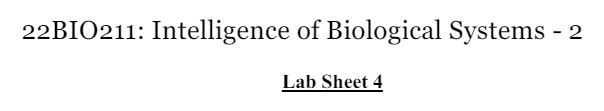

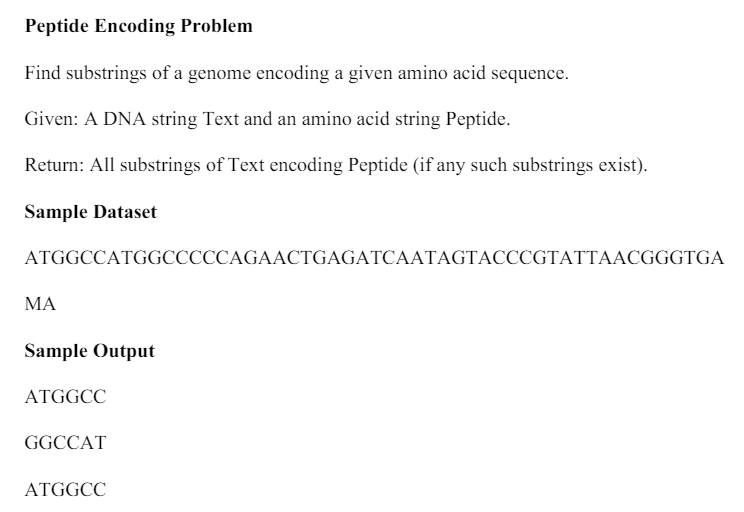

In [6]:
codon_table = {
    'F': ['TTT', 'TTC'],
    'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'Y': ['TAT', 'TAC'],
    'Stop': ['TAA', 'TAG', 'TGA'],
    'C': ['TGT', 'TGC'],
    'W': ['TGG'],
    'P': ['CCT', 'CCC', 'CCA', 'CCG'],
    'H': ['CAT', 'CAC'],
    'Q': ['CAA', 'CAG'],
    'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'I': ['ATT', 'ATC', 'ATA'],
    'M': ['ATG'],
    'T': ['ACT', 'ACC', 'ACA', 'ACG'],
    'N': ['AAT', 'AAC'],
    'K': ['AAA', 'AAG'],
    'V': ['GTT', 'GTC', 'GTA', 'GTG'],
    'A': ['GCT', 'GCC', 'GCA', 'GCG'],
    'D': ['GAT', 'GAC'],
    'E': ['GAA', 'GAG'],
    'G': ['GGT', 'GGC', 'GGA', 'GGG']
}

In [7]:
from itertools import product
def peptide_to_rna(peptide):
    codon_list = [codon_table[aa] for aa in peptide]
    rna_combinations = product(*codon_list)
    rna_strings = [''.join(codon) for codon in rna_combinations]
    return rna_strings

peptide_to_rna("MA")

['ATGGCT', 'ATGGCC', 'ATGGCA', 'ATGGCG']

In [9]:
def reverse(rna_seq):
    return ''.join({'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}[nuc] for nuc in rna_seq)[::-1]

In [12]:
peptide = "MA"
DNA = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"

def peptideEncoding(DNA, peptide):
  rna = []
  RNA = peptide_to_rna(peptide)
  reversecomplements = [reverse(i) for i in RNA]
  RNA.extend(reversecomplements)
  encodings = []
  k = len(RNA[0])
  for i in range(0, len(DNA)-k):
    if DNA[i:i+k] in RNA:
      encodings.append(DNA[i:i+k])
  return encodings

peptideEncoding(DNA, peptide)

['ATGGCT', 'ATGGCC', 'ATGGCA', 'ATGGCG', 'AGCCAT', 'GGCCAT', 'TGCCAT', 'CGCCAT']


['ATGGCC', 'GGCCAT', 'ATGGCC']

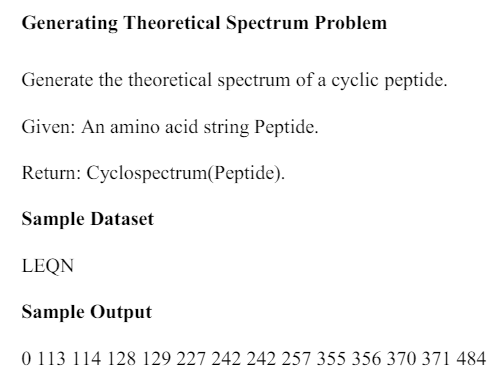

In [13]:
amino_acid_mass = {
    'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99, 'T': 101,
    'C': 103, 'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128,
    'Q': 128, 'E': 129, 'M': 131, 'H': 137, 'F': 147, 'R': 156,
    'Y': 163, 'W': 186
}

def cyclic_spectrum(peptide):
    n = len(peptide)
    prefix_mass = [0] * (n + 1)

    for i in range(1, n + 1):
        prefix_mass[i] = prefix_mass[i - 1] + amino_acid_mass[peptide[i - 1]]

    peptide_mass = prefix_mass[n]
    cyclic_spectrum = [0]


    for length in range(1, n):
        for start in range(n):
            if start + length <= n:
                subpeptide_mass = prefix_mass[start + length] - prefix_mass[start]
                cyclic_spectrum.append(subpeptide_mass)
            else:
                subpeptide_mass = peptide_mass - (prefix_mass[start] - prefix_mass[start + length - n])
                cyclic_spectrum.append(subpeptide_mass)

    cyclic_spectrum.append(peptide_mass)
    return sorted(cyclic_spectrum)

peptide = "LEQN"
result = cyclic_spectrum(peptide)
print(result)


[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]


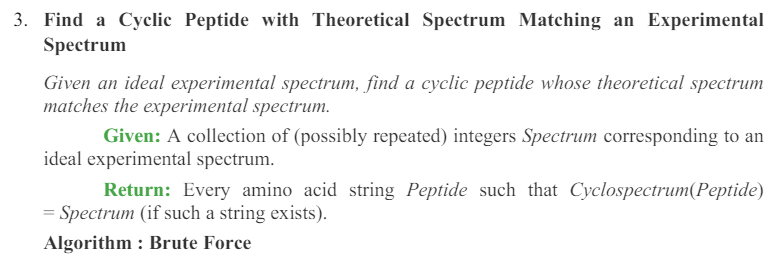

In [14]:
def mass_table():
    return {
        'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99, 'T': 101, 'C': 103, 'I': 113, 'L': 113,
        'N': 114, 'D': 115, 'K': 128, 'Q': 128, 'E': 129, 'M': 131, 'H': 137, 'F': 147, 'R': 156, 'Y': 163, 'W': 186
    }

def peptide_mass(peptide):
    return sum(mass_table()[aa] for aa in peptide)

def cyclospectrum(peptide):
    mass = [0]
    extended_peptide = peptide + peptide
    peptide_len = len(peptide)


    for length in range(1, peptide_len):
        for start in range(peptide_len):
            subpeptide = extended_peptide[start:start+length]
            mass.append(peptide_mass(subpeptide))

    mass.append(peptide_mass(peptide))
    return sorted(mass)

def expand_peptides(peptides, amino_acids):
    expanded = []
    for peptide in peptides:
        for aa in amino_acids:
            expanded.append(peptide + aa)
    return expanded

def is_consistent(peptide, spectrum):
    peptide_spectrum = cyclospectrum(peptide)
    for mass in peptide_spectrum:
        if peptide_spectrum.count(mass) > spectrum.count(mass):
            return False
    return True

def brute_force_cyclopeptide_sequencing(spectrum):
    amino_acids = list(mass_table().keys())
    peptides = ['']
    final_peptides = []
    spectrum = sorted(spectrum)
    max_spectrum_mass = max(spectrum)

    while peptides:
        peptides = expand_peptides(peptides, amino_acids)
        for peptide in peptides[:]:
            peptide_mass_val = peptide_mass(peptide)
            if peptide_mass_val == max_spectrum_mass:
                if cyclospectrum(peptide) == spectrum:
                    final_peptides.append(peptide)
                peptides.remove(peptide)
            elif peptide_mass_val > max_spectrum_mass or not is_consistent(peptide, spectrum):
                peptides.remove(peptide)

    return final_peptides

experimental_spectrum = [0, 113, 128, 186, 241, 299, 314, 427]
brute_force_cyclopeptide_sequencing(experimental_spectrum)

['IKW',
 'IQW',
 'IWK',
 'IWQ',
 'LKW',
 'LQW',
 'LWK',
 'LWQ',
 'KIW',
 'KLW',
 'KWI',
 'KWL',
 'QIW',
 'QLW',
 'QWI',
 'QWL',
 'WIK',
 'WIQ',
 'WLK',
 'WLQ',
 'WKI',
 'WKL',
 'WQI',
 'WQL']

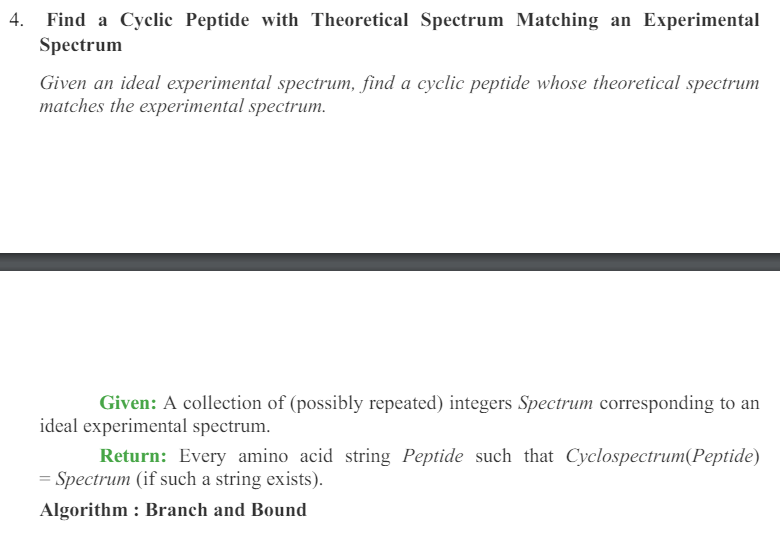

In [16]:
from collections import Counter

amino_acid_mass = {
    'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99, 'T': 101,
    'C': 103, 'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128,
    'Q': 128, 'E': 129, 'M': 131, 'H': 137, 'F': 147, 'R': 156,
    'Y': 163, 'W': 186
}

def cyclic_spectrum(peptide):
    n = len(peptide)
    prefix_mass = [0] * (n + 1)

    for i in range(1, n + 1):
        prefix_mass[i] = prefix_mass[i - 1] + amino_acid_mass[peptide[i - 1]]

    peptide_mass = prefix_mass[n]
    cyclic_spectrum = [0]

    for length in range(1, n):
        for start in range(n):
            if start + length <= n:
                subpeptide_mass = prefix_mass[start + length] - prefix_mass[start]
                cyclic_spectrum.append(subpeptide_mass)
            else:
                subpeptide_mass = peptide_mass - (prefix_mass[start] - prefix_mass[start + length - n])
                cyclic_spectrum.append(subpeptide_mass)

    cyclic_spectrum.append(peptide_mass)
    return sorted(cyclic_spectrum)

def linear_spectrum(peptide):
    n = len(peptide)
    prefix_mass = [0] * (n + 1)

    for i in range(1, n + 1):
        prefix_mass[i] = prefix_mass[i - 1] + amino_acid_mass[peptide[i - 1]]

    linear_spectrum = [0]

    for length in range(1, n + 1):
        for start in range(n - length + 1):
            subpeptide_mass = prefix_mass[start + length] - prefix_mass[start]
            linear_spectrum.append(subpeptide_mass)

    return sorted(linear_spectrum)


def consistent_with_spectrum(peptide_spectrum, experimental_spectrum):
    peptide_counter = Counter(peptide_spectrum)
    experimental_counter = Counter(experimental_spectrum)

    for mass in peptide_counter:
        if peptide_counter[mass] > experimental_counter[mass]:
            return False
    return True

def find_cyclic_peptide(spectrum):
    mass_list = list(amino_acid_mass.values())
    peptides = [""]
    results = []

    while peptides:
        peptides = expand(peptides, mass_list)
        for peptide in peptides[:]:
            if sum(amino_acid_mass[aa] for aa in peptide) == spectrum[-1]:
                if cyclic_spectrum(peptide) == sorted(spectrum):
                    results.append(peptide)
                peptides.remove(peptide)
            elif not consistent_with_spectrum(linear_spectrum(peptide), spectrum):
                peptides.remove(peptide)

    return results

def expand(peptides, mass_list):
    expanded_peptides = []
    for peptide in peptides:
        for aa, aa_mass in amino_acid_mass.items():
            expanded_peptides.append(peptide + aa)
    return expanded_peptides

experimental_spectrum = [0, 113, 128, 186, 241, 299, 314, 427]
results = find_cyclic_peptide(experimental_spectrum)
print(results)


['IKW', 'IQW', 'IWK', 'IWQ', 'LKW', 'LQW', 'LWK', 'LWQ', 'KIW', 'KLW', 'KWI', 'KWL', 'QIW', 'QLW', 'QWI', 'QWL', 'WIK', 'WIQ', 'WLK', 'WLQ', 'WKI', 'WKL', 'WQI', 'WQL']
